<h1 style="color:Orange;font-size:170%;">Correlation between movies variables in Python </h>

## Import
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

pd.options.mode.chained_assignment = None

### Import the data and start to investigate

In [2]:
# Now we need to read in the data
df = pd.read_csv(r'Datasets\movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [3]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [4]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


## Data Cleaning

In [5]:
# Check for missing data (null values)

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# We can see that we have some null value on the frame

df[df.isnull().any(axis=1)][null_columns]

,rating,released,score,votes,writer,star,country,budget,gross,company,runtime
16,R,"May 16, 1980 (United States)",6.6,21000.0,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,R,"December 12, 1980 (United States)",6.8,26000.0,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,PG,"June 6, 1980 (United States)",6.4,14000.0,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,R,"December 25, 1980 (United States)",6.9,33000.0,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,R,"March 21, 1980 (United States)",6.5,5100.0,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...
7663,NaN,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,NaN,"February 7, 2020 (United States)",4.7,36.0,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,NaN,"April 27, 2020 (Cameroon)",5.7,29.0,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,NaN,"October 1, 2020 (United States)",NaN,NaN,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [7]:
df.fillna(0, inplace=True)
df.head(17)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [8]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

In [11]:
df["budget"].dtype

dtype('int64')

### Correct the year column

In [12]:
df[["released", "year"]]

,released,year
0,"June 13, 1980 (United States)",1980
1,"July 2, 1980 (United States)",1980
2,"June 20, 1980 (United States)",1980
3,"July 2, 1980 (United States)",1980
4,"July 25, 1980 (United States)",1980
...,...,...
7663,"October 23, 2020 (United States)",2020
7664,"February 7, 2020 (United States)",2020
7665,"April 27, 2020 (Cameroon)",2020
7666,"October 1, 2020 (United States)",2020


In [13]:
df["rel_year"] = df["released"].str.split(' \(').str[0]
df["rel_year"] = df["rel_year"].str[-4:]
df.fillna(0, inplace=True)
df["rel_year"]= pd.to_numeric(df["rel_year"])
df["Same_year_checker"] = np.where(df["rel_year"] == df["year"], True, False)
df_year_mismatch = df.loc[df['Same_year_checker'] == False]
df_year_mismatch[["released", "rel_year","year"]]

,released,rel_year,year
8,"June 19, 1981 (United States)",1981,1980
11,"October 26, 1984 (United States)",1984,1980
21,"April 24, 1981 (United States)",1981,1980
33,"April 24, 1981 (United States)",1981,1980
40,"October 9, 1981 (United States)",1981,1980
...,...,...,...
7525,"January 17, 2020 (United States)",2020,2019
7580,"June 26, 2020 (United States)",2020,2019
7584,"February 4, 2020 (Australia)",2020,2019
7604,"May 19, 2020 (Poland)",2020,2019


In [14]:

df["year"] = df["rel_year"]
df.drop(columns=['rel_year','Same_year_checker'], axis ='columns', inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [15]:
df.sort_values(by='gross', inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1990,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,0,Comedy,1990,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0


In [16]:
# option to see all the row of a dataframe
#pd.set_option('display.max_rows', None)

### Drop duplicates values

In [17]:
# Shows all the unique values of companies
# in this case drop_duplicates show us what values are distinct. for actually drop this values ve need to reassign the values to the column df['company'] = df['company']....
df['company'].astype("str").drop_duplicates().sort_values(ascending=False)


7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
408                                       0
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2386, dtype: object

There are no duplicates on company column. In case there was was necessary to clean and correct tht data.

## Finding correlation between data
### Scatter plot budget vs gross

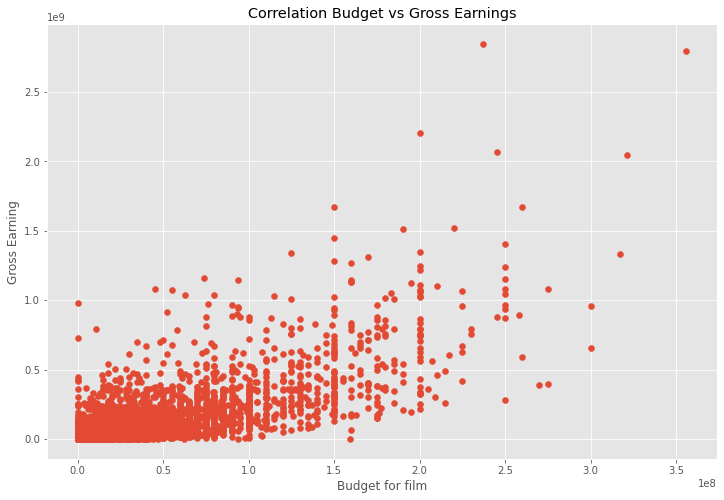

In [18]:
plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Correlation Budget vs Gross Earnings")
plt.xlabel("Budget for film")
plt.ylabel("Gross Earning")
plt.show()

In [19]:
df.sort_values(by='gross', inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1990,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,0,Comedy,1990,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0


### Plotting budget vs gross using seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

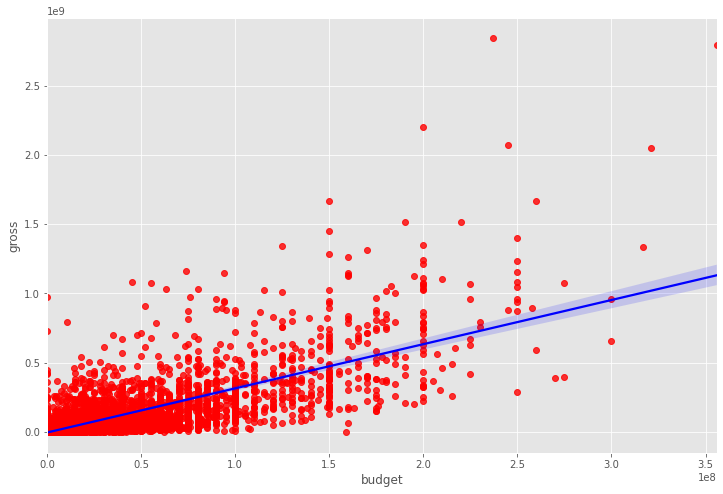

In [20]:
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

### Let's start to looking to correlation
 There are different methods for correlation:
 * pearson (default)
 * kendall
 * spearman
Check when to use which type.

In [21]:
df.corr(method = 'kendall') #  is only work on numerical data

,year,score,votes,budget,gross,runtime
year,1.000000,0.072838,0.324315,0.200629,0.206940,0.097006
score,0.072838,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.324315,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.200629,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.206940,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.097006,0.283601,0.197697,0.176184,0.177429,1.000000


There si a high correlation between budget and gross

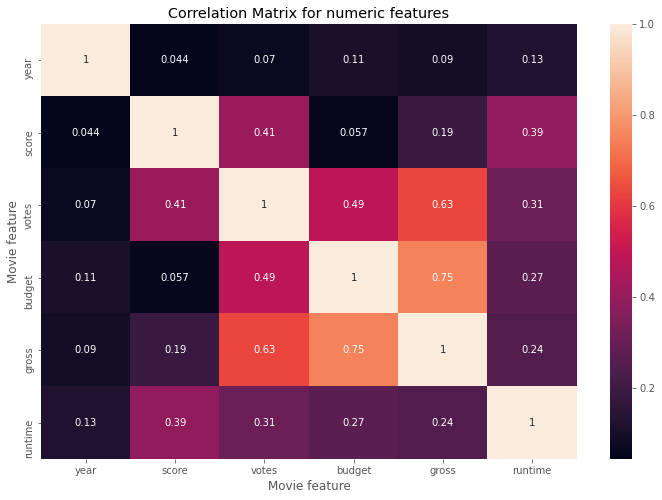

In [22]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix for numeric features")
plt.xlabel("Movie feature")
plt.ylabel("Movie feature")
plt.show()

### Looking at full correlation with companies

In [23]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1981,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [24]:
df_num = df.copy()

for col_name in df_num.columns:
    if df_num[col_name].dtype == 'object':
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

Let compare the 2 dataframe to see if everything works properly

In [25]:
df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,18.0,1500,2290,2422,56,7000,0,0,90.0
7664,1678,0,4,2020,1108,4.7,36.0,774,2615,1887,56,0,0,540,90.0
7665,4717,0,6,2020,194,5.7,29.0,2061,2684,2041,56,58750,0,942,0.0
7666,2843,0,6,2020,2818,0.0,0.0,1184,1825,451,56,15000,0,0,120.0


In [26]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


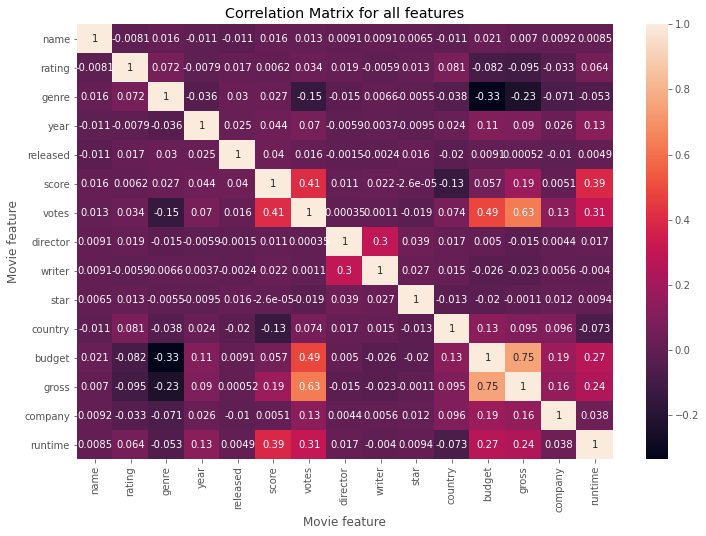

In [27]:
corr_matrix_num = df_num.corr(method='pearson')
sns.heatmap(corr_matrix_num, annot = True)
plt.title("Correlation Matrix for all features")
plt.xlabel("Movie feature")
plt.ylabel("Movie feature")
plt.show()

In [28]:
corr_matrix_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,-0.010642,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,-0.008069,1.000000,0.072423,-0.007922,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
genre,0.016355,0.072423,1.000000,-0.035768,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
year,-0.010642,-0.007922,-0.035768,1.000000,0.024619,0.043598,0.070183,-0.005853,0.003654,-0.009503,0.024378,0.108069,0.090394,0.025615,0.125727
released,-0.011311,0.016613,0.029822,0.024619,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852
score,0.016377,0.006192,0.027384,0.043598,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564
votes,0.013038,0.033743,-0.145296,0.070183,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984
director,0.009079,0.019483,-0.015258,-0.005853,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
writer,0.009081,-0.005921,0.006567,0.003654,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
star,0.006472,0.013405,-0.005477,-0.009503,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418


In [29]:
corr_pairs = corr_matrix_num.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year       -0.010642
         released   -0.011311
                       ...   
runtime  country    -0.073319
         budget      0.268372
         gross       0.244339
         company     0.037537
         runtime     1.000000
Length: 225, dtype: float64

In [30]:
sorted_pairs = corr_pairs.sort_values(ascending= False)
sorted_pairs

name     name       1.000000
rating   rating     1.000000
company  company    1.000000
gross    gross      1.000000
budget   budget     1.000000
                      ...   
genre    votes     -0.145296
         gross     -0.234297
gross    genre     -0.234297
budget   genre     -0.334021
genre    budget    -0.334021
Length: 225, dtype: float64

Let's check for the higher correlation between variables

In [31]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1.0)]
high_corr

gross   budget    0.750157
budget  gross     0.750157
votes   gross     0.632870
gross   votes     0.632870
dtype: float64

## Conclusion

After this project we could learn some technique for data cleaning and correlation. A swe saw the highest correlation between variables results to be between gross vs budget and gross vs votes.